<a href="https://colab.research.google.com/github/mauro-escobar/neural-networks/blob/main/Binary_Neural_Network_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following [this example](https://github.com/jaygshah/Binary-Neural-Networks/blob/281ebc7f3e712801c55aa77cef52365ecc2d146d/binary_deterministic_stochastic.py#L284).

### Imports and useful functions 

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import psutil
import time

#### `hard_sigmoid`

In [2]:
def hard_sigmoid(x):
    return np.clip((x+1.)/2.,0,1)

In [61]:
import numpy as np
import os
import pdb
import matplotlib.pyplot as plt

datasets_dir = '/content/drive/MyDrive/Colab Notebooks'


def one_hot(x, n):
    if type(x) == list:
        x = np.array(x)
    x = x.flatten()
    o_h = np.zeros((len(x), n))
    o_h[np.arange(len(x)), x] = 1
    return o_h

'''
def train_validation_split(noTrSamples=1000, noTsSamples=100, \
                        digit_range=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], \
                        noTrPerClass=100, noTsPerClass=10, trData=[],trLabels=[]):
    
    tsX = np.zeros((noTsSamples, 28*28))
    trX = np.zeros((noTrSamples, 28*28))
    tsY = np.zeros(noTsSamples)
    trY = np.zeros(noTrSamples)

    count = 0
    for ll in digit_range:
        # Train data
        idl = np.where(trLabels == ll)
        idl = idl[0][: noTrPerClass]
        idx = list(range(count*noTrPerClass, (count+1)*noTrPerClass))
        trX[idx, :] = trData[idl, :]
        trY[idx] = trLabels[idl]
        # Test data
        idl = np.where(tsLabels == ll)
        idl = idl[0][: noTsPerClass]
        idx = list(range(count*noTsPerClass, (count+1)*noTsPerClass))
        tsX[idx, :] = tsData[idl, :]
        tsY[idx] = tsLabels[idl]
        count += 1
    
    np.random.seed(1)
    test_idx = np.random.permutation(tsX.shape[0])
    tsX = tsX[test_idx,:]
    tsY = tsY[test_idx]

    trX = trX.T
    tsX = tsX.T
    trY = trY.reshape(1, -1)
    tsY = tsY.reshape(1, -1)
    return trX, trY, tsX, tsY
'''


def mnist(noTrSamples=1000, noTsSamples=100, \
          digit_range=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], \
          noTrPerClass=100, noTsPerClass=10):
    assert noTrSamples==noTrPerClass*len(digit_range), 'noTrSamples and noTrPerClass mismatch'
    assert noTsSamples==noTsPerClass*len(digit_range), 'noTrSamples and noTrPerClass mismatch'
    '''
    data_dir = os.path.join(datasets_dir, 'mnist/')
    fd = open(os.path.join(data_dir, 'train-images.idx3-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    trData = loaded[16:].reshape((60000, 28*28)).astype(float)

    fd = open(os.path.join(data_dir, 'train-labels.idx1-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    trLabels = loaded[8:].reshape((60000)).astype(float)

    fd = open(os.path.join(data_dir, 't10k-images.idx3-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    tsData = loaded[16:].reshape((10000, 28*28)).astype(float)

    fd = open(os.path.join(data_dir, 't10k-labels.idx1-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    tsLabels = loaded[8:].reshape((10000)).astype(float)
    '''
    (trData, trLabels), (tsData, tsLabels) = tf.keras.datasets.mnist.load_data()
    trData = trData.reshape((60000, 28*28)).astype(float)
    trLabels = trLabels.reshape((60000)).astype(float)
    tsData = tsData.reshape((10000, 28*28)).astype(float)
    tsLabels = tsLabels.reshape((10000)).astype(float)

    trData = trData/255.
    tsData = tsData/255.

    tsX = np.zeros((noTsSamples, 28*28))
    trX = np.zeros((noTrSamples, 28*28))
    tsY = np.zeros(noTsSamples)
    trY = np.zeros(noTrSamples)

    count = 0
    for ll in digit_range:
        # Train data
        idl = np.where(trLabels == ll)
        idl = idl[0][: noTrPerClass]
        idx = list(range(count*noTrPerClass, (count+1)*noTrPerClass))
        trX[idx, :] = trData[idl, :]
        trY[idx] = trLabels[idl]
        # Test data
        idl = np.where(tsLabels == ll)
        idl = idl[0][: noTsPerClass]
        idx = list(range(count*noTsPerClass, (count+1)*noTsPerClass))
        tsX[idx, :] = tsData[idl, :]
        tsY[idx] = tsLabels[idl]
        count += 1
    
    np.random.seed(1)
    test_idx = np.random.permutation(tsX.shape[0])
    tsX = tsX[test_idx,:]
    tsY = tsY[test_idx]

    trX = trX.T
    tsX = tsX.T
    trY = trY.reshape(1, -1)
    tsY = tsY.reshape(1, -1)
    return trX, trY, tsX, tsY

### Activation functions

#### `relu`

In [3]:
def relu(Z):
    '''
    computes relu activation of Z
    Inputs: 
        Z is a numpy.ndarray (n, m)
    Returns: 
        A is activation. numpy.ndarray (n, m)
        cache is a dictionary with {"Z", Z}
    '''
    A = np.maximum(0,Z)
    cache = {}
    cache["Z"] = Z
    return A, cache

#### `relu_der`

In [4]:
def relu_der(dA, cache):
    '''
    computes derivative of relu activation
    Inputs: 
        dA is the derivative from subsequent layer. numpy.ndarray (n, m)
        cache is a dictionary with {"Z", Z}, where Z was the input 
        to the activation layer during forward propagation
    Returns: 
        dZ is the derivative. numpy.ndarray (n,m)
    '''
    dZ = np.array(dA, copy=True)
    Z = cache["Z"]
    dZ[Z<0] = 0
    return dZ

#### `linear`

In [5]:
def linear(Z):
    '''
    computes linear activation of Z
    This function is implemented for completeness
    Inputs: 
        Z is a numpy.ndarray (n, m)
    Returns: 
        A is activation. numpy.ndarray (n, m)
        cache is a dictionary with {"Z", Z}
    '''
    A = Z
    cache = {}
    return A, cache

#### `linear_der`

In [6]:
def linear_der(dA, cache):
    '''
    computes derivative of linear activation
    This function is implemented for completeness
    Inputs: 
        dA is the derivative from subsequent layer. numpy.ndarray (n, m)
        cache is a dictionary with {"Z", Z}, where Z was the input 
        to the activation layer during forward propagation
    Returns: 
        dZ is the derivative. numpy.ndarray (n,m)
    '''
    dZ = np.array(dA, copy=True)
    return dZ

### Binarizing functions

#### `Binarize_Deterministic`

In [7]:
def Binarize_Deterministic(W,b):
    '''
    Input: activation of Z and Binarizing Weights
    Output: Binarized weights and activations
    '''
    threshold,upper,lower=0,1,-1
    
    Wb = np.zeros(W.shape)
    bb = np.zeros(b.shape)
    Wb[W>=threshold] = upper
    Wb[W<threshold] = lower
    bb[b>=threshold] = upper
    bb[b<threshold] = lower
    
    return Wb,bb

#### `Binarize_Deterministic_A`

In [8]:
def Binarize_Deterministic_A(A):
    '''
    Input: activation A 
    Output: Binarized A
    '''
    threshold,upper,lower=0,1,-1
    
    # A=Z
    Ab = np.zeros(A.shape)	
    Ab[A>=threshold] = upper
    Ab[A<threshold] = lower
    
    return Ab

#### `Binarize_Stochastic`

In [80]:
def Binarize_Stochastic(W,b):	
    #srng = RandomStreams(lasagne.random.get_rng().randint(1, 21))
    Wb = hard_sigmoid(W/1.0)
    #print(Wb.shape)
    Wb[Wb>=0.5] = 1
    Wb[Wb<0.5] = -1	
    bb = hard_sigmoid(b/1.0)
      
    return Wb,bb

### Loss function

#### `computeLoss`

In [10]:
def computeLoss(A,Y):
    # Calculating one hot vecs
    
    Y = Y.T
    row,col = Y.shape
    
    # Computing one_hot representation
    o_h = np.zeros((row,10))
    for i in range(0,row):
        temp = np.zeros((10,))
        #print Y[i][0]
        temp[int(Y[i][0])] = 1
        o_h[i] = temp
    
    A = np.log(A)
    
    total_cost = -1*np.multiply(o_h,A)
    
    avg_loss = np.sum(total_cost)/row
    
    return avg_loss

#### `softmax_cross_entropy_loss`

In [11]:
def softmax_cross_entropy_loss(Z, Y=np.array([])):
    '''
    Computes the softmax activation of the inputs Z
    Estimates the cross entropy loss
    Inputs: 
        Z - numpy.ndarray (n, m)
        Y - numpy.ndarray (1, m) of labels
            when y=[] loss is set to []
    
    Returns:
        A - numpy.ndarray (n, m) of softmax activations
        cache -  a dictionary to store the activations later used to estimate derivatives
        loss - cost of prediction
    '''
    ### CODE HERE 
    # print Z.shape
    row = Y.shape
    n,m = Z.shape
    Zmax = np.zeros((m,1))
    for i in range(0,m):    	
    	Zmax[i] = (np.amax(Z.T[i]))
        
    diff = Z.T - Zmax
    ediff = np.exp(diff)
    
    A = np.zeros((m,n))
    
    for i in range(0,m):
    	var = ediff[i]/np.sum(ediff[i])
    	A[i] = var
    
    # Calculating Loss now
    loss = 0
    if row[0] != 0:
    	loss = computeLoss(A,Y)

    #added by me could be wrong
    cache = {}
    cache["A"] = A
    return A.T, cache, loss

#### `softmax_cross_entropy_loss_der`

In [73]:
def softmax_cross_entropy_loss_der(Y, cache):
    '''
    Computes the derivative of softmax activation and cross entropy loss
    Inputs: 
        Y - numpy.ndarray (1, m) of labels
        cache -  a dictionary with cached activations A of size (n,m)
    Returns:
        dZ - numpy.ndarray (n, m) derivative for the previous layer
    '''
    ### CODE HERE 
    
    cache["A"] = cache["A"].T
    
    #computing one_hot representation
    Y = Y.T
    o_h = np.zeros((4200,10))
    for i in range(0,4200):
        temp = np.zeros((10,))	    
        temp[int(Y[i][0])] = 1
        o_h[i] = temp

    o_h = o_h.T        
    dZ = cache["A"]-o_h
    
    return dZ

### Initialization

#### `initialize_multilayer_weights`

In [13]:
def initialize_multilayer_weights(net_dims):
    '''
    Initializes the weights of the multilayer network
    Inputs: 
        net_dims - tuple of network dimensions
    Returns:
        dictionary of parameters
    '''
    np.random.seed(0)
    numLayers = len(net_dims)
    parameters = {}
    for l in range(numLayers-1):
        parameters["W"+str(l+1)] = np.random.randn(net_dims[l+1],net_dims[l])*0.001 #CODE HERE
        parameters["Wb"+str(l+1)] = np.zeros((net_dims[l+1],net_dims[l]))
        
        parameters["b"+str(l+1)] = np.zeros((net_dims[l+1],1)) #CODE HERE
        parameters["bb"+str(l+1)] = np.zeros((net_dims[l+1],1))
        
    return parameters

### Forward propagation

#### `linear_forward`

In [14]:
def linear_forward(A, W, b):
    '''
    Input A propagates through the layer 
    Z = WA + b is the output of this layer. 
    Inputs: 
        A - numpy.ndarray (n,m) the input to the layer
        W - numpy.ndarray (n_out, n) the weights of the layer
        b - numpy.ndarray (n_out, 1) the bias of the layer
    Returns:
        Z = WA + b, where Z is the numpy.ndarray (n_out, m) dimensions
        cache - a dictionary containing the inputs A
    '''
    ### CODE HERE
    Arow,Acol=A.shape

    Z = np.dot(A.T,W.T) + b.T
    Z = Z.T

    cache = {}
    cache["A"] = A
    return Z, cache

#### `layer_forward`

In [15]:
def layer_forward(A_prev, W, b, activation):
    '''
    Input A_prev propagates through the layer and the activation
    Inputs: 
        A_prev - numpy.ndarray (n,m) the input to the layer
        W - numpy.ndarray (n_out, n) the weights of the layer
        b - numpy.ndarray (n_out, 1) the bias of the layer
        activation - is the string that specifies the activation function
    Returns:
        A = g(Z), where Z = WA + b, where Z is the numpy.ndarray (n_out, m) 
          dimensions, and g is the the activation function
        cache - a dictionary containing the cache from the linear and the 
          nonlinear propagation to be used for derivative
    '''
    Z, lin_cache = linear_forward(A_prev, W, b)
    if activation == "relu":
        A, act_cache = relu(Z)        
    elif activation == "linear":
        A, act_cache = linear(Z)
    
    cache = {}
    cache["lin_cache"] = lin_cache
    cache["act_cache"] = act_cache
    return A, cache

#### `multi_layer_forward`

In [71]:
def multi_layer_forward(X, parameters):
    '''
    Forward propagation through the layers of the network
    Inputs: 
        X - numpy.ndarray (n,m) with n features and m samples
        parameters - dictionary of network parameters 
           {"W1":[..],"b1":[..],"W2":[..],"b2":[..]...}
    Returns:
        AL - numpy.ndarray (c,m)  - outputs of the last fully connected layer 
          before softmax, where c is number of categories and m is number of 
          samples in the batch
        caches - a dictionary of associated caches of parameters and network 
          inputs
    '''
    L = len(parameters)//4  
    A = X
    Ab = A
    
    caches = []
    for l in range(1,L):  # since there is no W0 and b0
        parameters["Wb"+str(l)],parameters["bb"+str(l)] = Binarize_Stochastic(
            parameters["W"+str(l)],parameters["b"+str(l)])
        A, cache = layer_forward(A,parameters["Wb"+str(l)], 
                                 parameters["bb"+str(l)], "relu")
        #in_training_mode = tf.placeholder(tf.float64) ## ?
        #Ak = keras.layers.BatchNormalization()      ## ?   
        caches.append(cache)
        
    AL, cache = layer_forward(A, parameters["W"+str(L)], 
                              parameters["b"+str(L)], "linear")
    caches.append(cache)
    return AL, caches

### Backward propagation

#### `linear_backward`

In [17]:
def linear_backward(dZ, cache, W, b):
    '''
    Backward prpagation through the linear layer
    Inputs:
        dZ - numpy.ndarray (n,m) derivative dL/dz 
        cache - a dictionary containing the inputs A, for the linear layer
            where Z = WA + b,    
            Z is (n,m); W is (n,p); A is (p,m); b is (n,1)
        W - numpy.ndarray (n,p)
        b - numpy.ndarray (n, 1)
    Returns:
        dA_prev - numpy.ndarray (p,m) the derivative to the previous layer
        dW - numpy.ndarray (n,p) the gradient of W 
        db - numpy.ndarray (n, 1) the gradient of b
    '''
    A_prev = cache["A"]
    ## CODE HERE
    dW = np.dot(dZ, A_prev.T)    
    db = np.sum(dZ, axis=1, keepdims=True)        
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

#### `layer_backward`

In [18]:
def layer_backward(dA, cache, W, b, activation):
    '''
    Backward propagation through the activation and linear layer
    Inputs:
        dA - numpy.ndarray (n,m) the derivative to the previous layer
        cache - dictionary containing the linear_cache and the activation_cache
        activation - activation of the layer
        W - numpy.ndarray (n,p)
        b - numpy.ndarray (n, 1)
    
    Returns:
        dA_prev - numpy.ndarray (p,m) the derivative to the previous layer
        dW - numpy.ndarray (n,p) the gradient of W 
        db - numpy.ndarray (n, 1) the gradient of b
    '''
    lin_cache = cache["lin_cache"]
    act_cache = cache["act_cache"]

    if activation == "sigmoid":
        dZ = sigmoid_der(dA, act_cache)
    elif activation == "tanh":
        dZ = tanh_der(dA, act_cache)
    elif activation == "relu":
        dZ = relu_der(dA, act_cache)
    elif activation == "linear":
        dZ = linear_der(dA, act_cache)
    dA_prev, dW, db = linear_backward(dZ, lin_cache, W, b)
    return dA_prev, dW, db

#### `multi_layer_backward`

In [19]:
def multi_layer_backward(dAL, caches, parameters):
    '''
    Back propgation through the layers of the network (except softmax 
    cross entropy) softmax_cross_entropy can be handled separately
    Inputs: 
        dAL - numpy.ndarray (n,m) derivatives from the softmax_cross_entropy 
          layer
        caches - a dictionary of associated caches of parameters and network 
          inputs
        parameters - dictionary of network parameters 
          {"W1":[..],"b1":[..],"W2":[..],"b2":[..]...}
    Returns:
        gradients - dictionary of gradient of network parameters 
            {"dW1":[..],"db1":[..],"dW2":[..],"db2":[..],...}
    '''
    L = len(caches)  # with one hidden layer, L = 2
    gradients = {}
    dA = dAL
    activation = "linear"
    for l in reversed(range(1,L+1)):
        dA, gradients["dW"+str(l)], gradients["db"+str(l)] = \
              layer_backward(dA, caches[l-1], parameters["W"+str(l)],
                             parameters["b"+str(l)], activation)
        activation = "relu"
    return gradients

In [20]:
'''
def compute_dA(A,Y):
    #Computes dA
    
    Arow,Acol = Y.shape    
    dA = -1*(np.divide(Y,A)) + np.divide((1-Y),(1-A))
    dA = dA/Acol
    
    return dA
'''

'\ndef compute_dA(A,Y):\n    #Computes dA\n    \n    Arow,Acol = Y.shape    \n    dA = -1*(np.divide(Y,A)) + np.divide((1-Y),(1-A))\n    dA = dA/Acol\n    \n    return dA\n'

### Evaluation and training

#### `classify`

In [21]:
def classify(X, parameters):
    '''
    Network prediction for inputs X
    Inputs: 
        X - numpy.ndarray (n,m) with n features and m samples
        parameters - dictionary of network parameters 
            {"W1":[..],"b1":[..],"W2":[..],"b2":[..],...}
    Returns:
        YPred - numpy.ndarray (1,m) of predictions
    '''
    ### CODE HERE 
    # Forward propagate X using multi_layer_forward
    # Get predictions using softmax_cross_entropy_loss
    # Estimate the class labels using predictions
    AL, caches = multi_layer_forward(X, parameters)
    A, cache, cost = softmax_cross_entropy_loss(AL)
    
    row,col = X.shape
    YPred = np.zeros((col,1))
    for i in range(0,col):
    	  YPred[i] = np.argmax(A.T[i])
    
    return YPred

#### `update_parameters`

In [22]:
def update_parameters(parameters, gradients, epoch, learning_rate, 
                      decay_rate=0.0):
    '''
    Updates the network parameters with gradient descent
    Inputs:
        parameters - dictionary of network parameters 
            {"W1":[..],"b1":[..],"W2":[..],"b2":[..],...}
        gradients - dictionary of gradient of network parameters 
            {"dW1":[..],"db1":[..],"dW2":[..],"db2":[..],...}
        epoch - epoch number
        learning_rate - step size for learning
        decay_rate - rate of decay of step size - not necessary - in case you 
        want to use
    '''
    alpha = learning_rate*(1/(1+decay_rate*epoch))
    L = len(parameters)//4    
    ### CODE HERE 
    for l in range(1,L):
    	parameters["W"+str(l)] = parameters["W"+str(l)] \
                               -(alpha*gradients["dW"+str(l)])
    	parameters["b"+str(l)] = parameters["b"+str(l)]\
                               -(alpha*gradients["db"+str(l)])

    return parameters, alpha

#### `multi_layer_network`

In [75]:
def multi_layer_network(batch, parameters, X, Y, VD, VL, net_dims, 
                        num_iterations=500, learning_rate=0.2, decay_rate=0.01):
    '''
    Creates the multilayer network and trains the network
    Inputs:
        X - numpy.ndarray (n,m) of training data
        Y - numpy.ndarray (1,m) of training data labels
        net_dims - tuple of layer dimensions
        num_iterations - num of epochs to train
        learning_rate - step size for gradient descent
    
    Returns:
        costs - list of costs over training
        parameters - dictionary of trained network parameters
    '''
    # parameters = initialize_multilayer_weights(net_dims)    
    A0 = X
    costs, Vcosts = [], []
    
    for ii in range(num_iterations):
        ### CODE HERE
        # Forward Prop
        ## call to multi_layer_forward to get activations
        AL, caches = multi_layer_forward(A0, parameters)
        
        ## call to softmax cross entropy loss
        A, cache, cost = softmax_cross_entropy_loss(AL, Y)
        
        # Validation Costs
        VAL, Vcaches = multi_layer_forward(VD, parameters)
        VA, Vcache, Vcost = softmax_cross_entropy_loss(VAL, VL)
        
        # Backward Prop
        ## call to softmax cross entropy loss der
        dZ = softmax_cross_entropy_loss_der(Y, cache)
        
        ## call to multi_layer_backward to get gradients
        gradients = multi_layer_backward(dZ, caches, parameters)
        
        ## call to update the parameters
        parameters, alpha = update_parameters(parameters, gradients, ii, 
                                              learning_rate, decay_rate)

        if batch % 9 == 0 and batch!=0:
            costs.append(cost)
            Vcosts.append(Vcost)
        if ii % 10 == 0:
            print("Train Cost at iteration {:d} is:".format(ii)+\
                  " {:0.5f}, learning rate: {:0.5f}\n".format(cost, alpha)+\
                  "Validation Cost at iteration {:d} is:".format(ii)+\
                  " {:0.5f}, learning rate: {:0.5f}" .format(Vcost, alpha))
    
    return costs, Vcosts, parameters

#### `calculateAccuracy`

In [24]:
def calculateAccuracy(pred,label):
    counter=0
    for i in range(0,pred.size-1):
	    if pred[0][i]==label[0][i]:
	      counter = counter+1
	
    accuracy = counter*(1.0)/pred.size
    return accuracy

#### `train_validation_split`

In [45]:
def train_validation_split(train_data,train_label):
    
    tv_data = np.split(train_data.T,[5000,6000,11000,12000,17000,18000,23000,
                                     24000,29000,30000,35000,36000,41000,42000,
                                     47000,48000,53000,54000,59000])
    tvl_data = np.split(train_label.T,[5000,6000,11000,12000,17000,18000,23000,
                                       24000,29000,30000,35000,36000,41000,42000,
                                       47000,48000,53000,54000,59000])
    
    train_data = []
    train_label = []
    
    train_data = tv_data[0]
    train_label = tvl_data[0]
    validation_data = tv_data[1]
    validation_label = tvl_data[1]    
    
    for i in range(2,len(tv_data)):
        if i%2==0:
            train_data = np.append(train_data, tv_data[i], axis=0)
            train_label = np.append(train_label, tvl_data[i], axis=0)
        else:
            validation_data = np.append(validation_data, tv_data[i], axis=0)
            validation_label = np.append(validation_label, tvl_data[i], axis=0)
	    
    

    train_data = train_data.T
    train_label = train_label.T
    validation_data = validation_data.T
    validation_label = validation_label.T
    return train_data, train_label, validation_data, validation_label

#### `main`

In [84]:
def main(net_dims):
    '''
    Trains a multilayer network for MNIST digit classification (all 10 digits)
    To create a network with 1 hidden layer of dimensions 800
    Run the progam as:
        python deepMultiClassNetwork_starter.py "[784,800]"
    The network will have the dimensions [784,800,10]
    784 is the input size of digit images (28pix x 28pix = 784)
    10 is the number of digits
    To create a network with 2 hidden layers of dimensions 800 and 500
    Run the progam as:
        python deepMultiClassNetwork_starter.py "[784,800,500]"
    The network will have the dimensions [784,800,500,10]
    784 is the input size of digit images (28pix x 28pix = 784)
    10 is the number of digits
    '''
    #net_dims = ast.literal_eval( sys.argv[1] )
    net_dims.append(10) # Adding the digits layer with dimensionality = 10
    print("Network dimensions are:" + str(net_dims))

    # getting the subset dataset from MNIST
    train_data, train_label, test_data, test_label = \
            mnist(noTrSamples=50000, noTsSamples=8000,
                  digit_range=[0,1,2,3,4,5,6,7,8,9],
                  noTrPerClass=5000, noTsPerClass=800)    

    train_data, validation_data,train_label, validation_label = \
      train_test_split(train_data.T, train_label.T, test_size=8000,
                       train_size=42000, random_state=42)
    
    learning_rate = 0.2
    num_iterations = 1
    epochs = 10
    parameters = initialize_multilayer_weights(net_dims)
            
    process = psutil.Process(os.getpid())
    total_time = 0
    times, costs, Vcosts = [], [], []
    for j in range(0,epochs):
        start = time.time()
        for i in range(0,10):
            print("EPOCH----------------------------->= "+str(j))
            print("BATCH----------------------------->= "+str(i))
            mini_train_data=train_data[i*4200 : (i*4200)+4200]
            mini_train_label=train_label[i*4200 : (i*4200)+4200]
            mini_train_data=mini_train_data.T
            mini_train_label=mini_train_label.T
        
            cost, Vcost, parameters = \
              multi_layer_network(i, parameters, 
                                  mini_train_data, mini_train_label, 
                                  validation_data.T, validation_label.T, 
                                  net_dims, num_iterations=num_iterations, 
                                  learning_rate=learning_rate)

        timetaken = time.time()-start
        total_time = total_time+timetaken
        print("TIME TAKEN=> " + str(timetaken)+" seconds")
        print(process.memory_info().rss)
        times.append(timetaken)
        costs.append(cost[0])
        Vcosts.append(Vcost[0])
        print(costs)
        print(Vcosts)

    print("TOTAL TIME TAKEN="+str(total_time))
    # compute the accuracy for training set and testing set
    train_Pred = classify(train_data.T, parameters)
    test_Pred = classify(test_data, parameters)    
    trAcc = calculateAccuracy(train_Pred.T, train_label.T)
    teAcc = calculateAccuracy(test_Pred.T, test_label)

    print("Accuracy for training set is {0:0.3f} %".format(trAcc))
    print("Accuracy for testing set is {0:0.3f} %".format(teAcc))
    
    
    print("MEMORY USAGE FOR TOTAL EPOCHS----->"+
          str((process.memory_info().rss * 0.001)/784)+"MB")
    
    ## CODE HERE to plot costs
    #train error vs iterations here
    x=[]
    for i in range(0,epochs):
    	x.append(i)
    print(costs)
    print(Vcosts)
    print(x)
    plt.plot(x,costs)#,'ro')
    plt.plot(x,Vcosts)#,'b^')
    plt.show()
    plt.plot(x,times)
    plt.show()

Network dimensions are:[784, 800, 500, 10]
EPOCH----------------------------->= 0
BATCH----------------------------->= 0
Train Cost at iteration 0 is: 5.91938, learning rate: 0.20000
Validation Cost at iteration 0 is: 5.92477, learning rate: 0.20000
EPOCH----------------------------->= 0
BATCH----------------------------->= 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


Train Cost at iteration 0 is: nan, learning rate: 0.20000
Validation Cost at iteration 0 is: nan, learning rate: 0.20000
EPOCH----------------------------->= 0
BATCH----------------------------->= 2
Train Cost at iteration 0 is: 60.94720, learning rate: 0.20000
Validation Cost at iteration 0 is: 59.67872, learning rate: 0.20000
EPOCH----------------------------->= 0
BATCH----------------------------->= 3
Train Cost at iteration 0 is: 15.01419, learning rate: 0.20000
Validation Cost at iteration 0 is: 15.36914, learning rate: 0.20000
EPOCH----------------------------->= 0
BATCH----------------------------->= 4
Train Cost at iteration 0 is: 5.64476, learning rate: 0.20000
Validation Cost at iteration 0 is: 5.59635, learning rate: 0.20000
EPOCH----------------------------->= 0
BATCH----------------------------->= 5
Train Cost at iteration 0 is: 3.19489, learning rate: 0.20000
Validation Cost at iteration 0 is: 3.21996, learning rate: 0.20000
EPOCH----------------------------->= 0
BATCH---

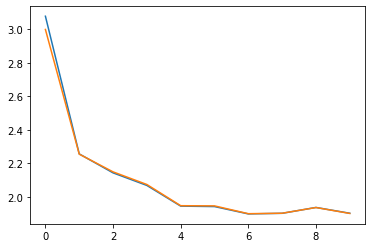

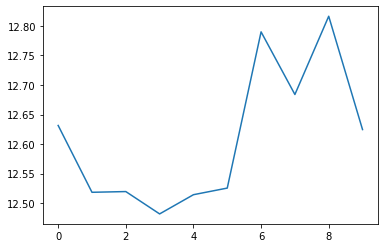

In [86]:
main([784,800,500])